In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings

In [ ]:
datos = pd.read_csv(r'C:\Users\miche\iris.csv', low_memory=False)

In [34]:
print(datos.info())
print(datos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  sepal_length  sepal_width  petal_length  petal_width      species
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
if 'Id' in datos.columns:
    datos = datos.drop(columns=['Id'])

In [ ]:
X = datos.iloc[:, :-1]
y = datos.iloc[:, -1]

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(X.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(X.var(axis=0))

----------------------
Media de cada variable
----------------------
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64


In [ ]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
pca_model = pca_pipeline.named_steps['pca']

In [ ]:
componentes = pd.DataFrame(
    data=pca_model.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
)
print("\nCargas de los componentes principales:")
print(componentes)


Cargas de los componentes principales:
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416
PC3      0.721017    -0.242033     -0.140892    -0.633801
PC4     -0.261996     0.124135      0.801154    -0.523546


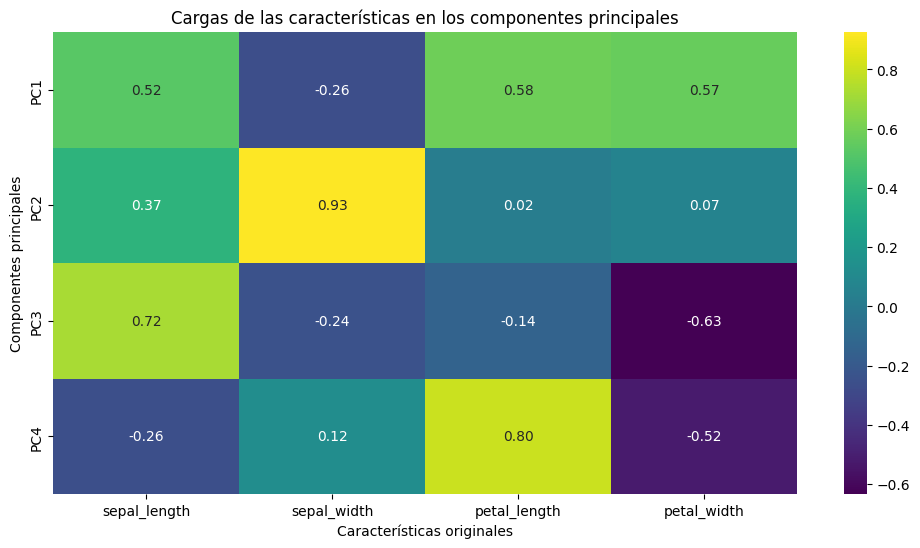

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(componentes, annot=True, cmap='viridis', fmt=".2f")
plt.title("Cargas de las características en los componentes principales")
plt.xlabel("Características originales")
plt.ylabel("Componentes principales")
plt.show()

In [ ]:
explained_variance_ratio = pca_model.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

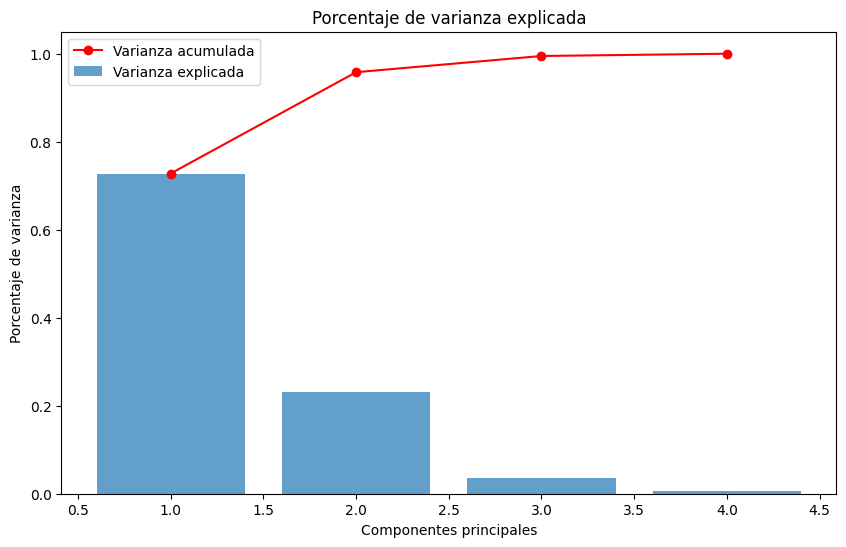

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, label='Varianza explicada')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='red', label='Varianza acumulada')
plt.title('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza')
plt.legend()
plt.show()

In [ ]:
n_componentes = np.argmax(cumulative_variance >= 0.85) + 1
print(f"\nNúmero de componentes necesarios para explicar el 85% de la varianza: {n_componentes}")


Número de componentes necesarios para explicar el 85% de la varianza: 2


In [ ]:
pca_reducido = PCA(n_components=n_componentes)
X_reducido = pca_reducido.fit_transform(StandardScaler().fit_transform(X))
print(f"Dimensiones reducidas: {X_reducido.shape}")


Dimensiones reducidas: (150, 2)


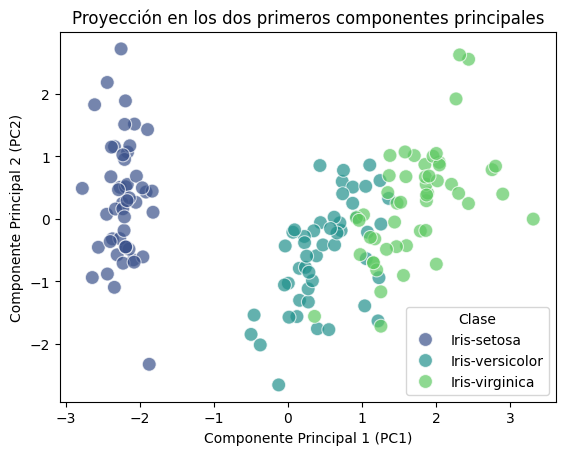

In [ ]:
df_pca = pd.DataFrame(X_reducido, columns=[f'PC{i+1}' for i in range(n_componentes)])
df_pca['Clase'] = y
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Clase', palette='viridis', s=100, alpha=0.7)
plt.title('Proyección en los dos primeros componentes principales')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Clase', loc='best')
plt.show()

In [ ]:
df_pca = pd.DataFrame(X_reducido, columns=[f'PC{i+1}' for i in range(n_componentes)])
df_pca['Clase'] = y

print("\nDatos reducidos:")
print(df_pca.head())


Datos reducidos:
        PC1       PC2        Clase
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa
